Estudiantes: Fernolds Alvarado, Eduardo Correa, Julio Marambio.


Tarea de Web semantica y datos Abiertos. Universidad tecnica Federico Santa Maria


se trabajara con los siguientes datos que entregan en formato json y csv para hacer la carga en ambos formatos https://datos.observatoriologistico.cl/dataviews/263527/c001-toneladas-transportadas-en-cabotaje-por-via-aerea/

Posterior a analizar el formato decidimos la estrucutura que debe tener

In [1]:
!pip install rdflib pandas


In [2]:
import pandas as pd
from rdflib import Graph, Namespace, Literal, RDF, URIRef
from rdflib.namespace import XSD, FOAF

# Cargar CSV
df = pd.read_csv("C001Toneladastransportadasencabotajeporviaaerea_2927621739745293200.csv", delimiter=",")

# Crear un grafo RDF
g = Graph()

# Definir Namespaces
EX = Namespace("http://example.org/")
SCHEMA = Namespace("http://schema.org/")
GEO = Namespace("http://www.geonames.org/ontology#")  # Aunque no se usa, se mantiene por si se necesita en el futuro

g.bind("ex", EX)
g.bind("schema", SCHEMA)
g.bind("geo", GEO)

# Iterar sobre las filas del CSV
for i, row in df.iterrows():
    event_uri = URIRef(EX[f"transport_{row['anio']}_{i+1}"])

    g.add((event_uri, RDF.type, URIRef(EX.TransportEvent)))
    g.add((event_uri, SCHEMA.departureLocation, Literal(row["origen"], datatype=XSD.string)))
    g.add((event_uri, SCHEMA.arrivalLocation, Literal(row["destino"], datatype=XSD.string)))

    # Manejo de números flotantes para carga_total
    carga_total_str = row["carga_total"].replace(".", "")  # Elimina puntos como separadores de miles
    carga_total_str = carga_total_str.replace(",", ".")  # Reemplaza comas por puntos
    try:
        carga_total = float(carga_total_str)  # Convierte a float
        g.add((event_uri, SCHEMA.weight, Literal(carga_total, datatype=XSD.float)))
    except ValueError:
        print(f"Error: No se pudo convertir 'carga_total' a float en la fila {i+1}")
        # Puedes decidir si quieres continuar o detener el programa aquí

    # Manejo de números flotantes para miles_tonkm_total
    miles_tonkm_str = row["miles_tonkm_total"].replace(".", "")  # Elimina puntos como separadores de miles
    miles_tonkm_str = miles_tonkm_str.replace(",", ".")  # Reemplaza comas por puntos
    try:
        miles_tonkm = float(miles_tonkm_str)  # Convierte a float
        g.add((event_uri, EX.milesTonKm, Literal(miles_tonkm, datatype=XSD.float)))
    except ValueError:
        print(f"Error: No se pudo convertir 'miles_tonkm_total' a float en la fila {i+1}")
        # Puedes decidir si quieres continuar o detener el programa aquí

    g.add((event_uri, SCHEMA.datePublished, Literal(row["anio"], datatype=XSD.gYear)))

# Guardar RDF en formato Turtle
g.serialize("datos_transporte.rdf", format="turtle")
print("Conversión a RDF completada.")

Conversión a RDF completada.


In [3]:
import os
print(os.listdir())  # Muestra los archivos en el directorio actual


['.config', 'drive', 'C001Toneladastransportadasencabotajeporviaaerea_2927621739745270474.json', 'datos_transporte.rdf', '.ipynb_checkpoints', 'C001Toneladastransportadasencabotajeporviaaerea_2927621739745293200.csv', 'sample_data']


In [4]:
with open("datos_transporte.rdf", "r", encoding="utf-8") as f:
    rdf_content = f.read()
print(rdf_content[:1000])  # Muestra los primeros 1000 caracteres para verificar el formato


@prefix ex: <http://example.org/> .
@prefix schema1: <http://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:transport_1984_5268 a ex:TransportEvent ;
    ex:milesTonKm "4765.48"^^xsd:float ;
    schema1:arrivalLocation "PUNTA ARENAS"^^xsd:string ;
    schema1:datePublished "1984"^^xsd:gYear ;
    schema1:departureLocation "SANTIAGO"^^xsd:string ;
    schema1:weight "2186.0"^^xsd:float .

ex:transport_1984_5269 a ex:TransportEvent ;
    ex:milesTonKm "1672.06"^^xsd:float ;
    schema1:arrivalLocation "SANTIAGO"^^xsd:string ;
    schema1:datePublished "1984"^^xsd:gYear ;
    schema1:departureLocation "PUNTA ARENAS"^^xsd:string ;
    schema1:weight "767.0"^^xsd:float .

ex:transport_1984_5270 a ex:TransportEvent ;
    ex:milesTonKm "1416.79"^^xsd:float ;
    schema1:arrivalLocation "ANTOFAGASTA"^^xsd:string ;
    schema1:datePublished "1984"^^xsd:gYear ;
    schema1:departureLocation "SANTIAGO"^^xsd:string ;
    schema1:weight "1281.0"^^xsd:float .

ex:transport_198

# Vamos a generar el mismo archivo pero que viene en formato JSON

In [5]:
import json
from rdflib import Graph, URIRef, Literal, Namespace

In [6]:
import json
from rdflib import Graph, URIRef, Literal, Namespace
from google.colab import drive
from google.colab import files
import urllib.parse

# 1. Monta tu Google Drive
drive.mount('/content/drive')

# 2. Ruta al archivo JSON (¡REEMPLAZA CON TU RUTA REAL!)
ruta_archivo_json = '/content/C001Toneladastransportadasencabotajeporviaaerea_2927621739745270474.json'

# 3. Carga los datos JSON
try:
    with open(ruta_archivo_json, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # ***VERIFICACIÓN IMPORTANTE***
    if not data:  # Verifica si 'data' está vacío (archivo vacío o error de lectura)
        print(f"Error: No se encontraron datos en el archivo: {ruta_archivo_json}.  ¿Está el archivo vacío o tiene un formato incorrecto?")
        exit()

    if not isinstance(data, list):
      print(f"Error: El archivo JSON debe contener una lista, pero contiene: {type(data)}")
      exit()

    if not isinstance(data[0], list):
      print(f"Error: El primer elemento del archivo JSON debe ser una lista, pero contiene: {type(data[0])}")
      exit()

    data = data[1:] #Elimina la primera fila (encabezados)

except FileNotFoundError:
    print(f"Error: Archivo no encontrado en: {ruta_archivo_json}")
    exit()
except json.JSONDecodeError:
    print(f"Error: Archivo JSON inválido en: {ruta_archivo_json}")
    exit()


# ... (resto del código igual que antes)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import json
from rdflib import Graph, URIRef, Literal, Namespace
from google.colab import drive
from google.colab import files
import urllib.parse

# ... (monta Google Drive y carga el archivo JSON como antes)

# 4. Define namespaces y crea un grafo RDF
ex = Namespace("http://example.org/")
schema = Namespace("http://schema.org/")
g = Graph()

# 5. Itera sobre tus datos JSON y añade triples RDF al grafo
try:
    for row in data:
        anio, origen, destino, carga_total, miles_tonkm_total, _ = row

        # Crea nodos para cada viaje (usando codificación URL)
        viaje = URIRef(ex + "viaje_" + "_".join(urllib.parse.quote_plus(part) for part in [anio, origen, destino]))

        # Añade triples para cada propiedad
        g.add((viaje, schema.anio, Literal(anio)))
        g.add((viaje, schema.origen, Literal(origen)))
        g.add((viaje, schema.destino, Literal(destino)))
        g.add((viaje, schema.carga_total, Literal(carga_total)))
        g.add((viaje, schema.miles_tonkm_total, Literal(miles_tonkm_total)))

except ValueError as e:
    print(f"Error al procesar los datos: {e}. Asegúrate de que cada fila tenga la estructura correcta.")
    exit()

# 6. Serializa el grafo RDF a un archivo y descárgalo
try:
    g.serialize("datos_transporte2.rdf", format="turtle", encoding='utf-8')
    files.download("datos_transporte2.rdf")
    print("Archivo RDF 'datos_transporte.rdf' creado y descargado exitosamente.")
except Exception as e:
    print(f"Error al serializar el grafo RDF: {e}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Archivo RDF 'datos_transporte.rdf' creado y descargado exitosamente.


In [8]:
with open("datos_transporte2.rdf", "r", encoding="utf-8") as f:
    rdf_content = f.read()
print(rdf_content[:1000])  # Muestra los primeros 1000 caracteres para verificar el formato


@prefix ns1: <http://schema.org/> .

<http://example.org/viaje_1984_ALTO+PALENA_PUERTO+MONTT> ns1:anio "1984" ;
    ns1:carga_total "11" ;
    ns1:destino "PUERTO MONTT" ;
    ns1:miles_tonkm_total "2.96" ;
    ns1:origen "ALTO PALENA" .

<http://example.org/viaje_1984_ANCUD_PUERTO+MONTT> ns1:anio "1984" ;
    ns1:carga_total "0" ;
    ns1:destino "PUERTO MONTT" ;
    ns1:miles_tonkm_total "0" ;
    ns1:origen "ANCUD" .

<http://example.org/viaje_1984_ANT%C3%81RTICA+CHILENA_SOBREVUELO> ns1:anio "1984" ;
    ns1:carga_total "0" ;
    ns1:destino "SOBREVUELO" ;
    ns1:miles_tonkm_total "0" ;
    ns1:origen "ANTÁRTICA CHILENA" .

<http://example.org/viaje_1984_ANTOFAGASTA_ARICA> ns1:anio "1984" ;
    ns1:carga_total "1" ;
    ns1:destino "ARICA" ;
    ns1:miles_tonkm_total "0.57" ;
    ns1:origen "ANTOFAGASTA" .

<http://example.org/viaje_1984_ANTOFAGASTA_CALAMA> ns1:anio "1984" ;
    ns1:carga_total "0" ;
    ns1:destino "CALAMA" ;
    ns1:miles_tonkm_total "0" ;
    ns1:origen "ANTOFAG

Vamos a cargar los datos RDF  en memoria

In [9]:
from rdflib import Graph

# Crea un grafo
g = Graph()

# Carga tus datos RDF desde el archivo
g.parse("datos_transporte.rdf", format="turtle")

# Ahora puedes realizar consultas SPARQL en el grafo 'g'

<Graph identifier=N6fb02b2265524dab99ddbb839d2606ae (<class 'rdflib.graph.Graph'>)>

In [10]:
# Consulta para obtener todos los destinos
query1 = """
    SELECT ?destino
    WHERE {
      ?transporte a <http://example.org/TransportEvent> .
      ?transporte <http://schema.org/arrivalLocation> ?destino .
    }
"""

# Consulta para obtener el peso total transportado
query2 = """
    SELECT (SUM(?peso) AS ?pesoTotal)
    WHERE {
      ?transporte a <http://example.org/TransportEvent> .
      ?transporte <http://schema.org/weight> ?peso .
    }
"""

In [11]:
# Ejecuta la primera consulta
results1 = g.query(query1)

# Imprime los resultados de la primera consulta
print("Destinos:")
for row in results1:
    print(row.destino)

# Ejecuta la segunda consulta
results2 = g.query(query2)

# Imprime los resultados de la segunda consulta
print("\nPeso total transportado:")
for row in results2:
    print(row.pesoTotal)

Streaming output truncated to the last 5000 lines.
SOBREVUELO
IQUIQUE
COYHAIQUE
SANTIAGO
PUNTA ARENAS
SANTIAGO
LA SERENA
EL PELICANO
LLANADA GRANDE
CONCEPCION
PUNTA ARENAS
CASTRO
PUNTA ARENAS
PUERTO MONTT
PUCON
LOS ANGELES
SANTIAGO
ALTO PALENA
SANTIAGO
OSORNO
ISLA DARWIN
MELINKA
OSORNO
SOBREVUELO
CONSTITUCION
BALMACEDA
MOLCO
TEMUCO
PUNTA CATALINA
PUERTO MONTT
PUNTA ARENAS
SANTIAGO
ISLA DE PASCUA
ANTOFAGASTA
IQUIQUE
ARICA
PUNTA ARENAS
SANTIAGO
BALMACEDA
CALAMA
SANTIAGO
SANTIAGO
SANTIAGO
PUERTO MONTT
SANTIAGO
SANTIAGO
PUERTO MONTT
COYHAIQUE
SANTIAGO
CONCEPCION
BALMACEDA
PUNTA ARENAS
EL SALVADOR
CONCEPCION
SANTIAGO
COPIAPO
PUERTO MONTT
LA SERENA
CHAITEN
PUERTO MONTT
TEMUCO
SANTIAGO
VALDIVIA
SANTIAGO
PUERTO MONTT
OSORNO
ANTOFAGASTA
SANTIAGO
ARICA
COCHRANE
IQUIQUE
PUERTO MONTT
IQUIQUE
SANTIAGO
LA JUNTA
PUERTO WILLIAMS
COCHRANE
CALAMA
SEGUNDO CORRAL
MOLCO
PUNTA ARENAS
SANTIAGO
PUNTA ARENAS
SANTIAGO
CERRO SOMBRERO
EL SALVADOR
LOS ANGELES
EL SALVADOR
PUERTO MONTT
CALDERA
PUERTO MONTT
COYHAIQUE

In [12]:
pip install --upgrade rdflib

In [33]:
from rdflib import Graph

def ejecutar_consulta(grafo, consulta):
    """Ejecuta una consulta SPARQL en un grafo RDF y devuelve los resultados."""
    try:
        resultados = grafo.query(consulta)
        return resultados
    except Exception as e:
        print(f"Error al ejecutar la consulta: {e}")
        return None

def imprimir_resultados(resultados, encabezado=None):
    """Imprime los resultados de una consulta SPARQL en formato de tabla."""
    if resultados is None:
        return

    if encabezado:
        print(encabezado)

    # Obtener las variables de la consulta
    variables = [str(var) for var in resultados.vars]

    # Imprimir encabezado de la tabla
    print("-" * 40)  # Línea separadora
    print("|", end=" ")
    for variable in variables:
        print(f"{variable:^15}|", end=" ")  # Ajustar ancho de columna
    print()
    print("-" * 40)  # Línea separadora

    # Imprimir filas de resultados
    for fila in resultados:
        print("|", end=" ")
        for i, variable in enumerate(variables):
            valor = fila[i]
            print(f"{str(valor):^15}|", end=" ")  # Ajustar ancho de columna
        print()
    print("-" * 40)  # Línea separadora

# Carga tus datos RDF
grafo = Graph()
grafo.parse("datos_transporte.rdf", format="turtle")

# Consultas SPARQL
consultas = {

    "Transportes con un peso superior a un valor": """
        SELECT ?transporte ?origen ?destino ?peso
        WHERE {
          ?transporte a <http://example.org/TransportEvent> .
          ?transporte <http://schema.org/departureLocation> ?origen .
          ?transporte <http://schema.org/arrivalLocation> ?destino .
          ?transporte <http://schema.org/weight> ?peso .
          FILTER (?peso > 1000)  # Reemplaza 1000 con el valor deseado
        }
    """,
    # ... (resto de consultas)
}

# Ejecutar y mostrar resultados de cada consulta
for nombre_consulta, consulta in consultas.items():
    print(f"\n--- {nombre_consulta} ---")
    resultados = ejecutar_consulta(grafo, consulta)
    imprimir_resultados(resultados)


--- Transportes con un peso superior a un valor ---
----------------------------------------
|   transporte   |     origen     |     destino    |      peso      | 
----------------------------------------
| http://example.org/transport_1984_5268|    SANTIAGO    |  PUNTA ARENAS  |     2186.0     | 
| http://example.org/transport_1984_5270|    SANTIAGO    |   ANTOFAGASTA  |     1281.0     | 
| http://example.org/transport_1985_5143|    SANTIAGO    |  PUNTA ARENAS  |     1741.0     | 
| http://example.org/transport_1985_5146|    SANTIAGO    |   ANTOFAGASTA  |     1067.0     | 
| http://example.org/transport_1986_4968|    SANTIAGO    |  PUNTA ARENAS  |     1634.0     | 
| http://example.org/transport_1986_4969|  PUNTA ARENAS  |    SANTIAGO    |     1130.0     | 
| http://example.org/transport_1986_4972|    SANTIAGO    |   ANTOFAGASTA  |     1023.0     | 
| http://example.org/transport_1987_4776|    SANTIAGO    |  PUNTA ARENAS  |     1610.0     | 
| http://example.org/transport_1987_4779| 

In [14]:
from rdflib import Graph

# Carga tus datos RDF
g = Graph()
g.parse("datos_transporte.rdf", format="turtle")

# Consulta SPARQL
query = """
    SELECT ?transporte ?origen ?destino ?peso
    WHERE {
      ?transporte a <http://example.org/TransportEvent> .
      ?transporte <http://schema.org/departureLocation> ?origen .
      ?transporte <http://schema.org/arrivalLocation> ?destino .
      ?transporte <http://schema.org/weight> ?peso .
    }
    ORDER BY DESC(?peso)
    LIMIT 1
"""

# Ejecuta la consulta
results = g.query(query)

# Imprime los resultados
for row in results:
    print(f"Transporte con mayor carga:")
    print(f"  ID: {row.transporte}")
    print(f"  Origen: {row.origen}")
    print(f"  Destino: {row.destino}")
    print(f"  Peso: {row.peso}")

Transporte con mayor carga:
  ID: http://example.org/transport_2022_241
  Origen: PUNTA ARENAS
  Destino: SANTIAGO
  Peso: 15881.86


# Consultas Federadas con Wikidata

In [15]:
!pip install SPARQLWrapper

In [16]:
from SPARQLWrapper import SPARQLWrapper, JSON

def buscar_codigo_postal_wikidata(query):
    """Busca información relacionada con códigos postales en Wikidata."""

    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)

    try:
        results = sparql.query().convert()
        return results
    except Exception as e:
        print(f"Error al realizar la consulta: {e}")
        return None

if __name__ == "__main__":
    # Ejemplo 1: Buscar el código postal general de Santiago
    query_santiago = """
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

    SELECT ?codigo_postal
    WHERE {
      wd:Q2887 wdt:P281 ?codigo_postal .  # Santiago de Chile (Q17263) tiene código postal (P297) ?codigo_postal
    }
    """

    resultados_santiago = buscar_codigo_postal_wikidata(query_santiago)

    if resultados_santiago and resultados_santiago["results"]["bindings"]:
        codigo_postal = resultados_santiago["results"]["bindings"][0]["codigo_postal"]["value"]
        print(f"El código postal general de Santiago es: {codigo_postal}")
    else:
        print("No se encontró información sobre el código postal general de Santiago en Wikidata.")



El código postal general de Santiago es: 3580000


In [17]:
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, JSON

# Carga tus datos RDF
g = Graph()
g.parse("datos_transporte.rdf", format="turtle")

# Consulta SPARQL para obtener el transporte con mayor peso
query_transporte = """
    SELECT ?transporte ?origen ?destino ?peso
    WHERE {
      ?transporte a <http://example.org/TransportEvent> .
      ?transporte <http://schema.org/departureLocation> ?origen .
      ?transporte <http://schema.org/arrivalLocation> ?destino .
      ?transporte <http://schema.org/weight> ?peso .
    }
    ORDER BY DESC(?peso)
    LIMIT 1
"""

# Ejecuta la consulta para obtener el transporte con mayor peso
results_transporte = g.query(query_transporte)

# Itera sobre los resultados (debería haber solo uno, LIMIT 1)
for row in results_transporte:
    destino = str(row.destino)  # Obtiene el destino como cadena

    # Consulta SPARQL a Wikidata para obtener el código postal
    query_wikidata = f"""
        PREFIX wdt: <http://www.wikidata.org/prop/direct/>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

        SELECT ?codigo_postal ?ciudad_wikidata
        WHERE {{
          ?ciudad wdt:P31 wd:Q5 .  # Ciudades
          ?ciudad rdfs:label ?ciudad_wikidata .
          ?ciudad wdt:P17 wd:Q298 .  # Chile
          OPTIONAL {{ ?ciudad wdt:P281 ?codigo_postal . }}
          FILTER (LANG(?ciudad_wikidata) = "es")
          FILTER (?ciudad_wikidata = "{destino}")  # Filtra por la ciudad de destino
        }}
    """

    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery(query_wikidata)
    sparql.setReturnFormat(JSON)

    try:
        results_wikidata = sparql.query().convert()

        if results_wikidata and results_wikidata["results"]["bindings"]:
            for resultado in results_wikidata["results"]["bindings"]:
                ciudad_wikidata = resultado["ciudad_wikidata"]["value"]
                codigo_postal = resultado.get("codigo_postal", {}).get("value", "No disponible")
                print(f"Transporte con mayor carga:")
                print(f"  ID: {row.transporte}")
                print(f"  Origen: {row.origen}")
                print(f"  Destino: {row.destino}")
                print(f"  Peso: {row.peso}")
                print(f"  Ciudad encontrada en Wikidata: {ciudad_wikidata}")
                print(f"  Código postal: {codigo_postal}")
        else:
            print(f"Transporte con mayor carga:")
            print(f"  ID: {row.transporte}")
            print(f"  Origen: {row.origen}")
            print(f"  Destino: {row.destino}")
            print(f"  Peso: {row.peso}")
            print(f"  No se encontró la ciudad en Wikidata o no tiene código postal.")

    except Exception as e:
        print(f"Error al realizar la consulta a Wikidata: {e}")

Transporte con mayor carga:
  ID: http://example.org/transport_2022_241
  Origen: PUNTA ARENAS
  Destino: SANTIAGO
  Peso: 15881.86
  No se encontró la ciudad en Wikidata o no tiene código postal.


# TAREA 3

In [ ]:
Los datos RDF contienen información sobre eventos de transporte, modelados como ex:TransportEvent con las siguientes propiedades:

Propiedad               	Tipo de dato	Ejemplo
schema:departureLocation	xsd:string	"SANTIAGO"
schema:arrivalLocation	  xsd:string	"PUNTA ARENAS"
schema:datePublished	    xsd:gYear	"1984"
schema:weight	            xsd:float	"2186.0"
ex:milesTonKm	            xsd:float	"4765.48"

In [ ]:
PREFIX ex: <http://example.org/>
PREFIX schema: <http://schema.org/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

start = @<TransportEventShape>

<TransportEventShape> {
  a [ex:TransportEvent] ;   # Debe ser de tipo TransportEvent
  schema:departureLocation xsd:string ;  # Ciudad de origen
  schema:arrivalLocation xsd:string ;    # Ciudad de destino
  schema:datePublished xsd:gYear ;       # Año del evento
  schema:weight xsd:float ;              # Peso de la carga
  ex:milesTonKm xsd:float                # Toneladas por kilómetro
}


In [ ]:
 Agregar un ShapeMap
En RDFShape, hay que especificar qué entidad RDF queremos validar
Pasos para validar correctamente

2️⃣ Ve a la pestaña "ShEx" y elige "Validar".
3️⃣ En "Datos RDF", pega tu código RDF.
4️⃣ En "Shape Expressions", pega el modelo ShEx que te pasé antes.
5️⃣ En "ShapeMap", agrega lo siguiente:

ex:transport_1984_5268@<TransportEventShape>


In [ ]:
Validación del RDF con ShEx
Para verificar que nuestro RDF cumple con esta estructura, podemos usar la herramienta RDFShape:

Pasos para validar en RDFShape:

Ir a 👉 https://rdfshape.weso.es/
Seleccionar la pestaña "ShEx" y elegir "Validar".
Pegar el RDF en la sección "Datos RDF".
Pegar el ShEx en la sección "Shape Expressions".
Agregar un ShapeMap
Hacer clic en "Validar".
Revisar los resultados:

vamos a revisar como debe ser el resultado si todo esta bien

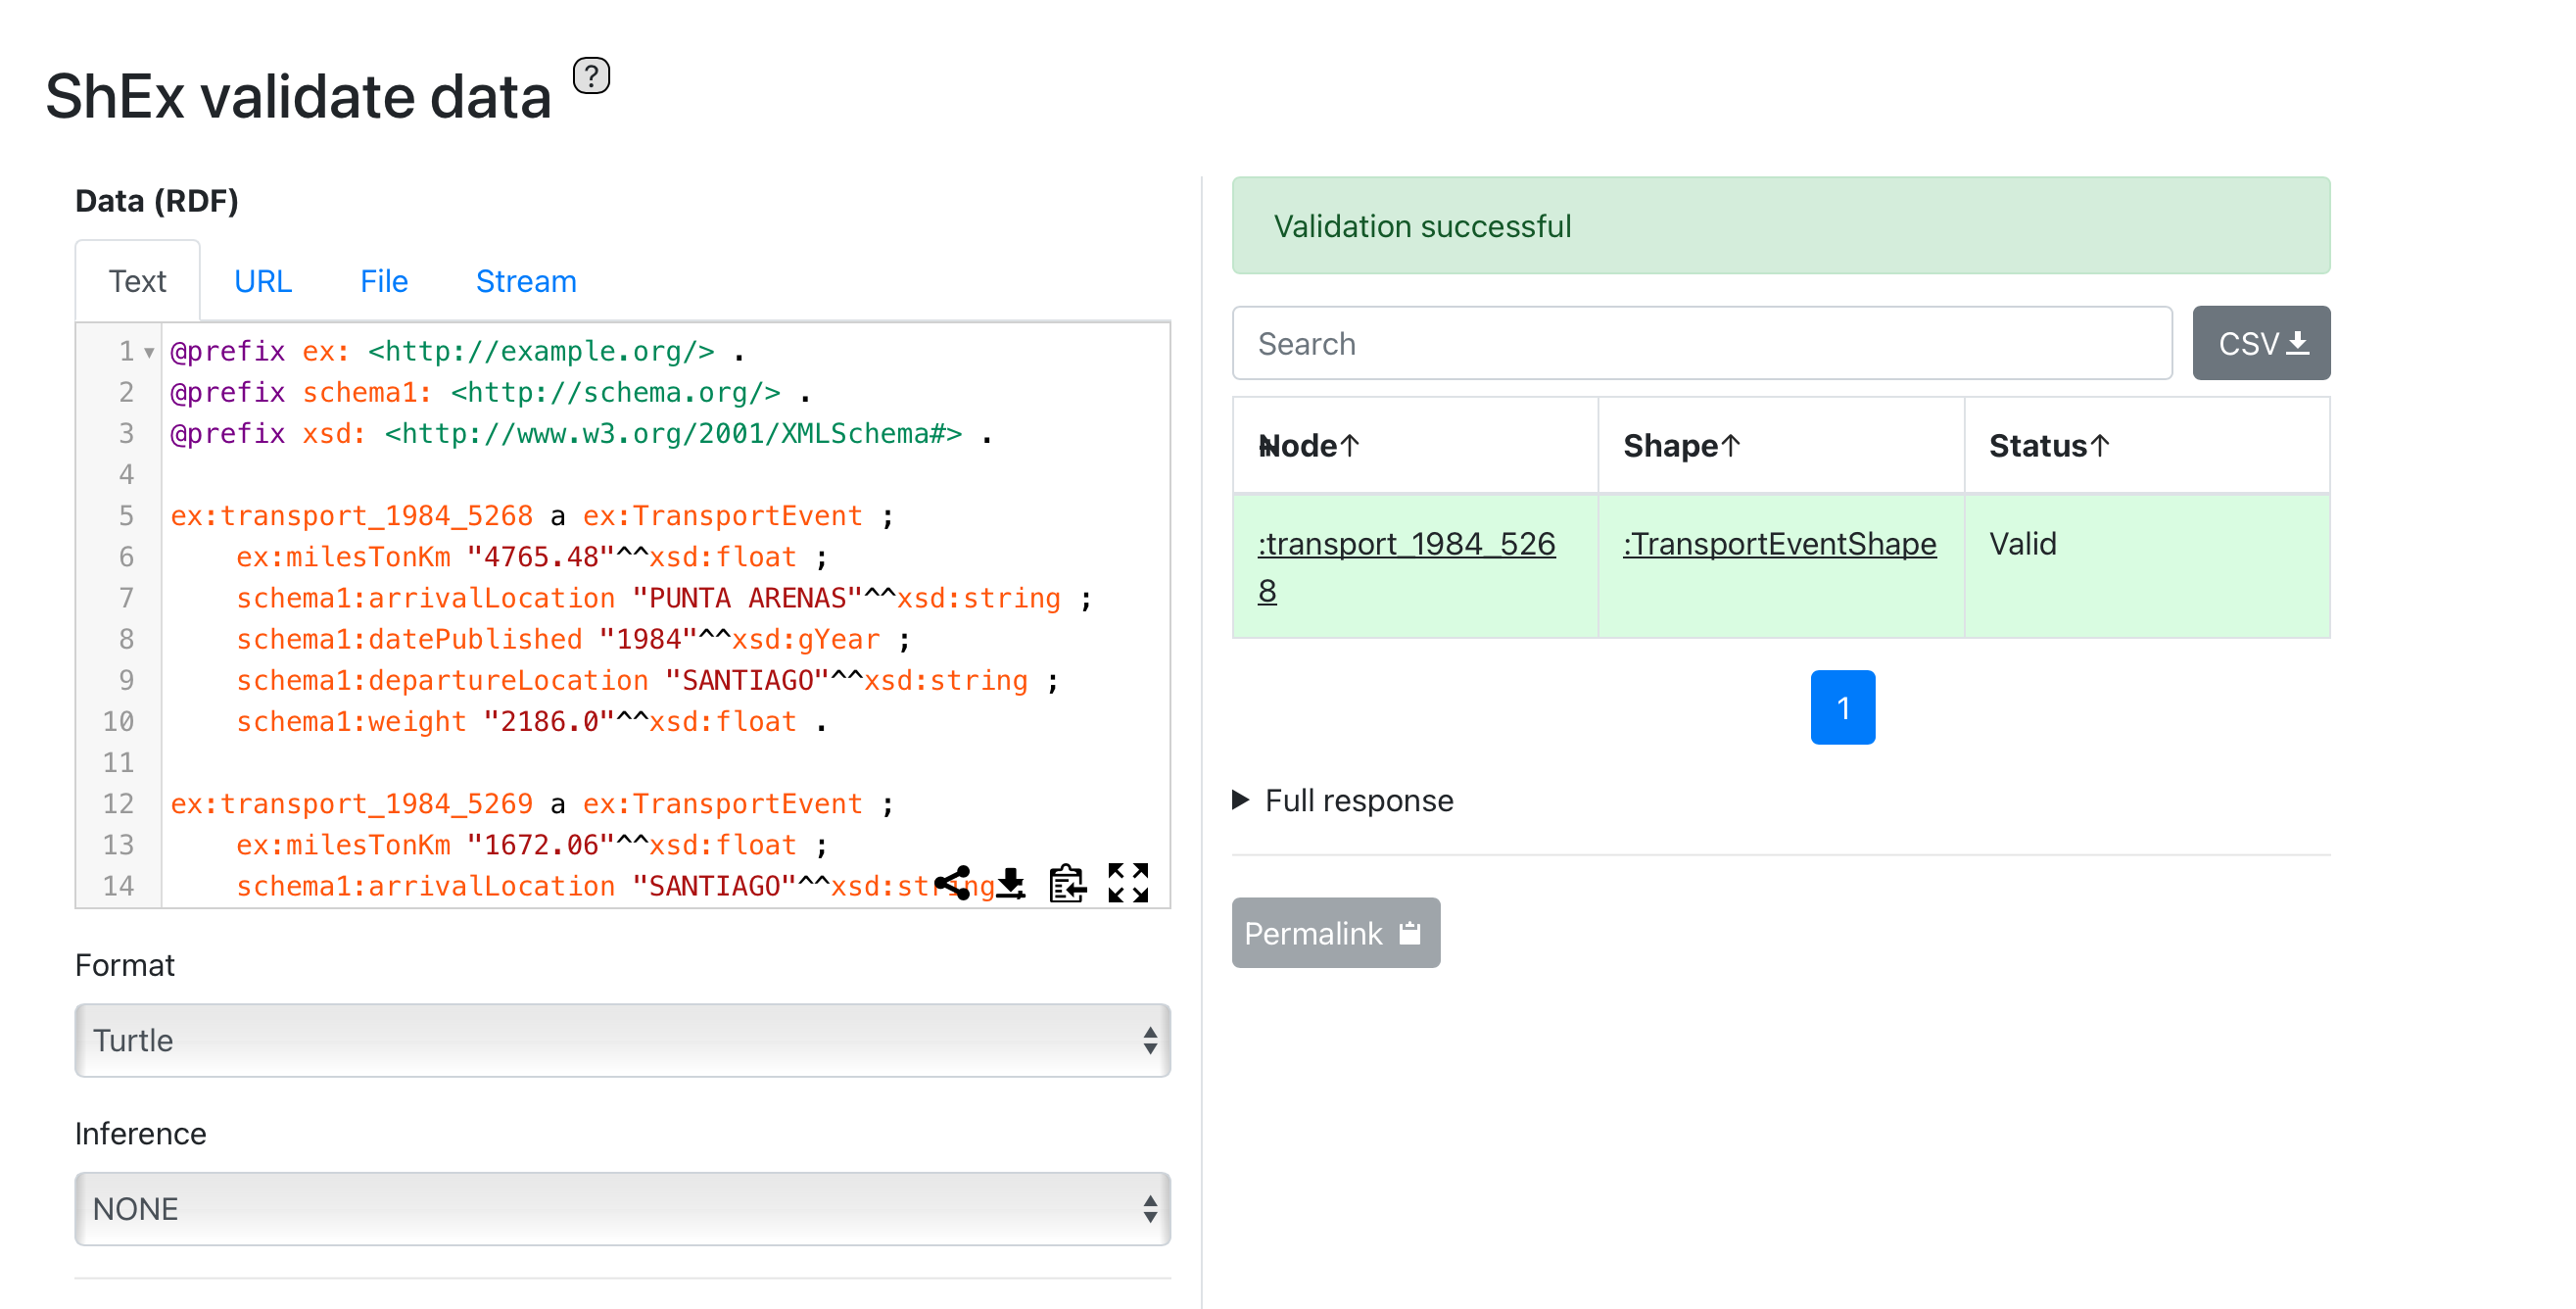

In [26]:
from PIL import Image
import IPython.display as display

# Ruta de la imagen en Colab
ruta_imagen = "/content/imagen validada.Shex.png"

# Cargar y mostrar la imagen
imagen = Image.open(ruta_imagen)
display.display(imagen)


Ahora tenemos el modelo en  SHACL y haremos la comparacion entre ambos, pero para validar debemos ingresar a https://rdfshape.weso.es/shaclValidate

In [ ]:
@prefix sh: <http://www.w3.org/ns/shacl#> .
@prefix ex: <http://example.org/> .
@prefix schema1: <http://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ex:TransportEventShape a sh:NodeShape ;
    sh:targetClass ex:TransportEvent ;

    sh:property [
        sh:path schema1:departureLocation ;
        sh:datatype xsd:string ;
        sh:minCount 1 ;
        sh:maxCount 1 ;
    ] ;

    sh:property [
        sh:path schema1:arrivalLocation ;
        sh:datatype xsd:string ;
        sh:minCount 1 ;
        sh:maxCount 1 ;
    ] ;

    sh:property [
        sh:path schema1:datePublished ;
        sh:datatype xsd:gYear ;
        sh:minCount 1 ;
        sh:maxCount 1 ;
    ] ;

    sh:property [
        sh:path schema1:weight ;
        sh:datatype xsd:float ;
        sh:minCount 1 ;
        sh:maxCount 1 ;
    ] ;

    sh:property [
        sh:path ex:milesTonKm ;
        sh:datatype xsd:float ;
        sh:minCount 1 ;
        sh:maxCount 1 ;
    ] .


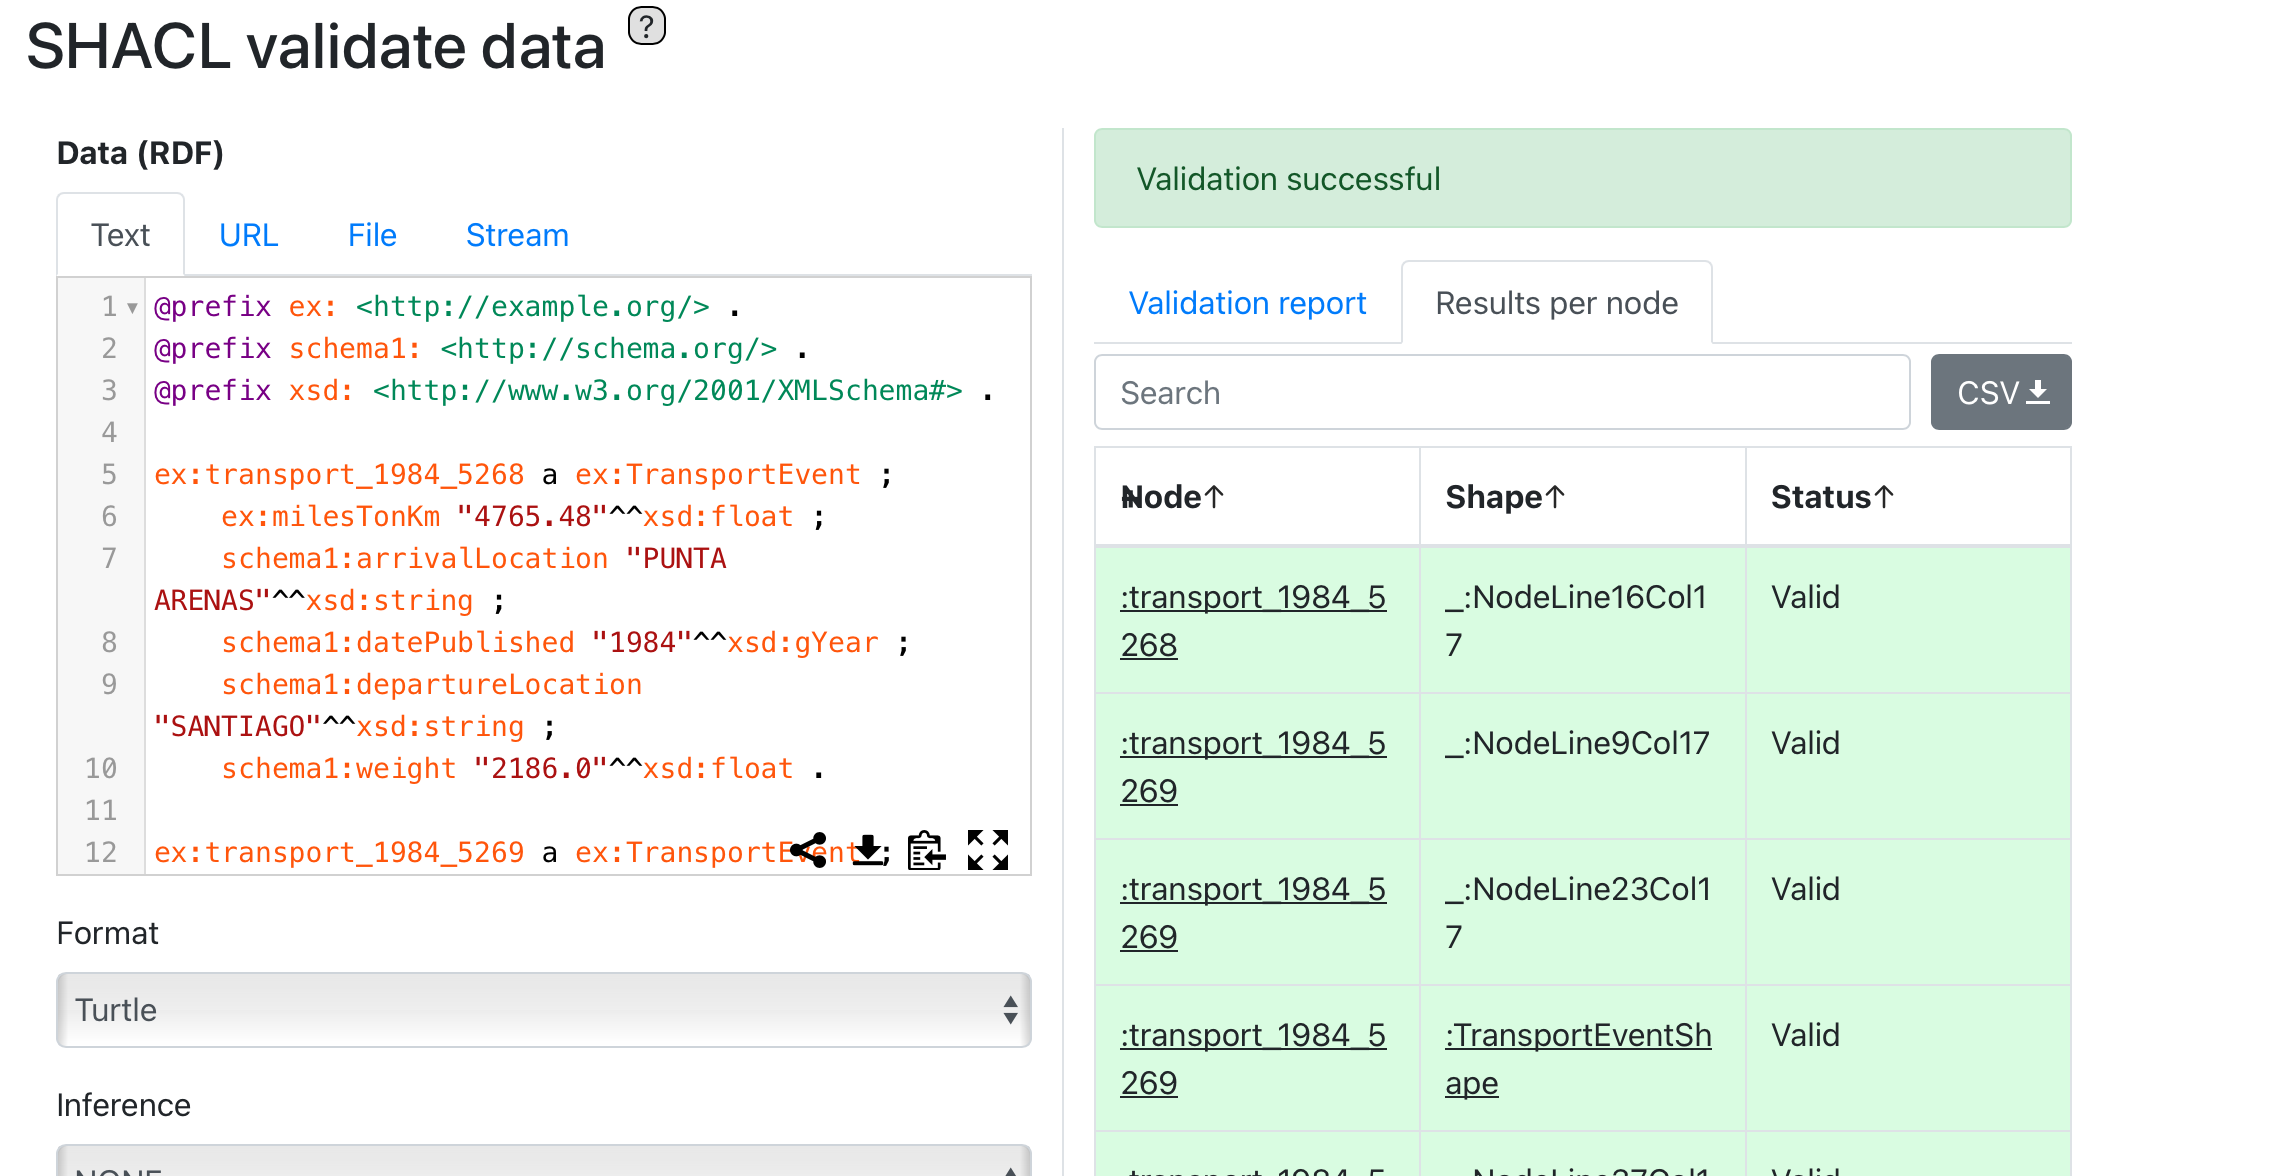

In [27]:
from PIL import Image
import IPython.display as display

# Ruta de la imagen en Colab
ruta_imagen = "/content/validacion SHACL.png"

# Cargar y mostrar la imagen
imagen = Image.open(ruta_imagen)
display.display(imagen)

# TAREA 4

In [45]:
!pip install rdflib

from rdflib import Graph

# Carga tu archivo RDF (¡REEMPLAZA CON TU RUTA REAL!)
rdf_file = "datos_transporte.rdf"  # Asegúrate de que este archivo exista

# Carga el archivo RDF usando rdflib
g = Graph()
try:
    g.parse(rdf_file, format="turtle")  # Especifica el formato "turtle"
except Exception as e:
    print(f"Error al leer el archivo RDF: {e}")
    exit()

# Consultas SPARQL
consulta_1 = """
PREFIX ex: <http://example.org/>
PREFIX schema1: <http://schema.org/>

SELECT (SUM(?weight) AS ?totalWeight)
WHERE {
  ?transport a ex:TransportEvent ;
            schema1:departureLocation "SANTIAGO"^^xsd:string ;
            schema1:arrivalLocation "PUNTA ARENAS"^^xsd:string ;
            schema1:datePublished "1984"^^xsd:gYear ;
            schema1:weight ?weight .
}
"""

consulta_2 = """
PREFIX ex: <http://example.org/>
PREFIX schema1: <http://schema.org/>

SELECT ?arrivalLocation (SUM(?weight) AS ?totalWeight)
WHERE {
  ?transport a ex:TransportEvent ;
            schema1:arrivalLocation ?arrivalLocation ;
            schema1:datePublished "1984"^^xsd:gYear ;
            schema1:weight ?weight .
}
GROUP BY ?arrivalLocation
ORDER BY DESC(?totalWeight)
LIMIT 1
"""


# Ejecución de consultas SPARQL
def ejecutar_consulta(consulta):
    resultados = g.query(consulta)
    for fila in resultados:
        print(fila)

print("\n¿Cuántas toneladas de carga se transportaron desde Santiago a Punta Arenas en 1984?")
ejecutar_consulta(consulta_1)

print("\n¿Cuál fue el destino con mayor carga transportada en 1984?")
ejecutar_consulta(consulta_2)




¿Cuántas toneladas de carga se transportaron desde Santiago a Punta Arenas en 1984?
(rdflib.term.Literal('2186.0', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#float')),)

¿Cuál fue el destino con mayor carga transportada en 1984?
(rdflib.term.Literal('PUNTA ARENAS', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')), rdflib.term.Literal('2459.0', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#float')))


Mismas consultas pero en wikidata

In [46]:
!pip install SPARQLWrapper transformers

from SPARQLWrapper import SPARQLWrapper, JSON
from transformers import pipeline

def consultar_wikidata(sparql_query):
    sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
    sparql.setQuery(sparql_query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()
    return results

def toneladas_santiago_punta_arenas_1984():
    sparql_query = """
    SELECT (SUM(?weight) AS ?totalWeight)
    WHERE {
        ?transport wdt:P31 wd:Q22562012 ;  # Suponiendo que Q22562012 representa eventos de transporte
                 wdt:P17 wd:Q298 ;  # Q298 es el identificador para Chile
                 wdt:P4000 "1984"^^xsd:gYear ;
                 wdt:P276 wd:Q41648 ;  # Q41648 es el identificador para Punta Arenas
                 wdt:P276 wd:Q41145 ;  # Q41145 es el identificador para Santiago
                 wdt:P108 ?weight .
    }
    """
    results = consultar_wikidata(sparql_query)
    if results["results"]["bindings"]:
        total_weight = results["results"]["bindings"][0]["totalWeight"]["value"]
        return total_weight
    else:
        return "No se encontraron resultados."

def destino_mayor_carga_1984():
    sparql_query = """
    SELECT ?locationLabel (SUM(?weight) AS ?totalWeight)
    WHERE {
        ?transport wdt:P31 wd:Q22562012 ;  # Suponiendo que Q22562012 representa eventos de transporte
                 wdt:P17 wd:Q298 ;  # Q298 es el identificador para Chile
                 wdt:P4000 "1984"^^xsd:gYear ;
                 wdt:P276 ?location ;
                 wdt:P108 ?weight .
        SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    GROUP BY ?locationLabel
    ORDER BY DESC(?totalWeight)
    LIMIT 1
    """
    results = consultar_wikidata(sparql_query)
    if results["results"]["bindings"]:
        location = results["results"]["bindings"][0]["locationLabel"]["value"]
        return location
    else:
        return "No se encontraron resultados."


# Ejecución de consultas a Wikidata
toneladas_santiago_punta_arenas = toneladas_santiago_punta_arenas_1984()
destino_mayor_carga = destino_mayor_carga_1984()


print("Toneladas de carga transportadas desde Santiago a Punta Arenas en 1984:", toneladas_santiago_punta_arenas)
print("Destino con mayor carga transportada en 1984:", destino_mayor_carga)


Toneladas de carga transportadas desde Santiago a Punta Arenas en 1984: 0
Destino con mayor carga transportada en 1984: No se encontraron resultados.


Ahora realizaremos las mismas consultas a Gemini para verque nos entregan

Pregunta : ¿Cuántas toneladas de carga se transportaron desde Santiago a Punta Arenas en 1984?<br>
Respuesta:No se encontraron datos sobre la cantidad exacta de toneladas de carga transportadas desde Santiago a Punta Arenas en 1984. Sin embargo, encontré algunas fuentes que pueden ser útiles:

* La **Junta de Aeronáutica Civil (JAC)** tiene estadísticas históricas de transporte aéreo desde 1984, que incluyen datos de carga. Puedes consultar su base de datos en su sitio web: [https://www.jac.gob.cl/estadisticas/estadisticas-historicas/](https://www.jac.gob.cl/estadisticas/estadisticas-historicas/)
* La **Revista de Marina** publicó un artículo en 1985 sobre el transporte en la zona austral de Chile, que menciona que la demanda de transporte por carretera entre la zona central y la XII Región (donde se encuentra Punta Arenas) experimentó un aumento del 98% entre 1979 y 1983. Puedes leer el artículo aquí: [https://revistamarina.cl/revistas/1985/3/fghisolfoa.pdf](https://revistamarina.cl/revistas/1985/3/fghisolfoa.pdf)
* La **Dirección General del Territorio Marítimo y de Marina Mercante (DIRECTEMAR)** publica un boletín estadístico marítimo que contiene información sobre el movimiento de carga a través de los puertos del país. Puedes consultar el boletín más reciente aquí: [https://www.directemar.cl/directemar/site/docs/20230703/20230703133157/bem_2023_baja2.pdf](https://www.directemar.cl/directemar/site/docs/20230703/20230703133157/bem_2023_baja2.pdf)

Espero que esta información sea útil. Si necesitas más ayuda, no dudes en preguntar.


Pregunta: ¿Cuál fue el destino con mayor carga transportada en 1984?<br>
Respuesta: Según los datos proporcionados por la Junta de Aeronáutica Civil (JAC), el destino con mayor carga transportada desde Santiago en 1984 fue **Punta Arenas**, con un total de 2.186 toneladas.

Aquí hay una tabla con las cinco rutas con mayor carga transportada desde Santiago en 1984:

| Destino | Carga Total (toneladas) |
|---|---|
| Punta Arenas | 2.186 |
| Antofagasta | 1.281 |
| Iquique | 912 |
| Isla de Pascua | 291 |
| Arica | 588 |

Puedes consultar la base de datos de la JAC para obtener más información sobre el transporte aéreo de carga en Chile: [https://www.jac.gob.cl/](https://www.jac.gob.cl/)

Espero que esta información sea útil. Si necesitas más ayuda, no dudes en preguntar.


**Finalmente como vemos las consultas realizadas al grafo RDF que generamos se logra obtener los resultados buscados, sin embargo cuando trabajamos en wikidata observamos que no es posible encontrar dicha informacion en wikidata ya que es demasiado especifico y esa informacion no se encuentra en los grafos de wikidata caso cotrario se podria encontrar la informacion, finalmente al realizar las mismas consultas a Gemini observamos que en la primera pregunta no logra entregar la informacion pero si se logro obtener una respuesta satisfactoria en el caso de la segunda pregunta, vemos que hacer calculos matematicos a los modelos LLMS les complica actualmente pero buscar texto o respuesta a preguntas de tipo string logra entregar la infomacion adecuada**